<a href="https://colab.research.google.com/github/arun-arunisto/OpenCVTutorial/blob/todo/ComputerVisionTutorial10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#High Dynamic Range (HDR) Imaging

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#importing libraries
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

##Basic Idea
1. The <b>dynamic range</b> of images is limited to 8-bits (0-255) per channel
2. very bright(sample, white) pixels saturate to 255
3. very dark(sample, black) pixels clip to 0

#Step 1: Capture Multiple Exposures

In [6]:
def readImagesAndTimes():
  #list of filenames
  filenames = ["img_0.033.jpg", "img_0.25.jpg", "img_2.5.jpg",
               "img_15.jpg"]
  #list of exposure times
  times = np.array([1/30.0, 0.25, 2.5, 15.0], dtype=np.float32)

  #Read Images
  images = []
  for filename in filenames:
    im = cv.imread("/content/drive/MyDrive/ComputerVisionTutorial/HDR/"+filename)
    im = cv.cvtColor(im, cv.COLOR_BGR2RGB)
    images.append(im)
  return images, times

#Step 2: Align Images

In [8]:
#read images and exposure times
images, times = readImagesAndTimes()

#aligning images
alignMTB = cv.createAlignMTB()
alignMTB.process(images, images)

#Step 3: Estimate Camera Response Function

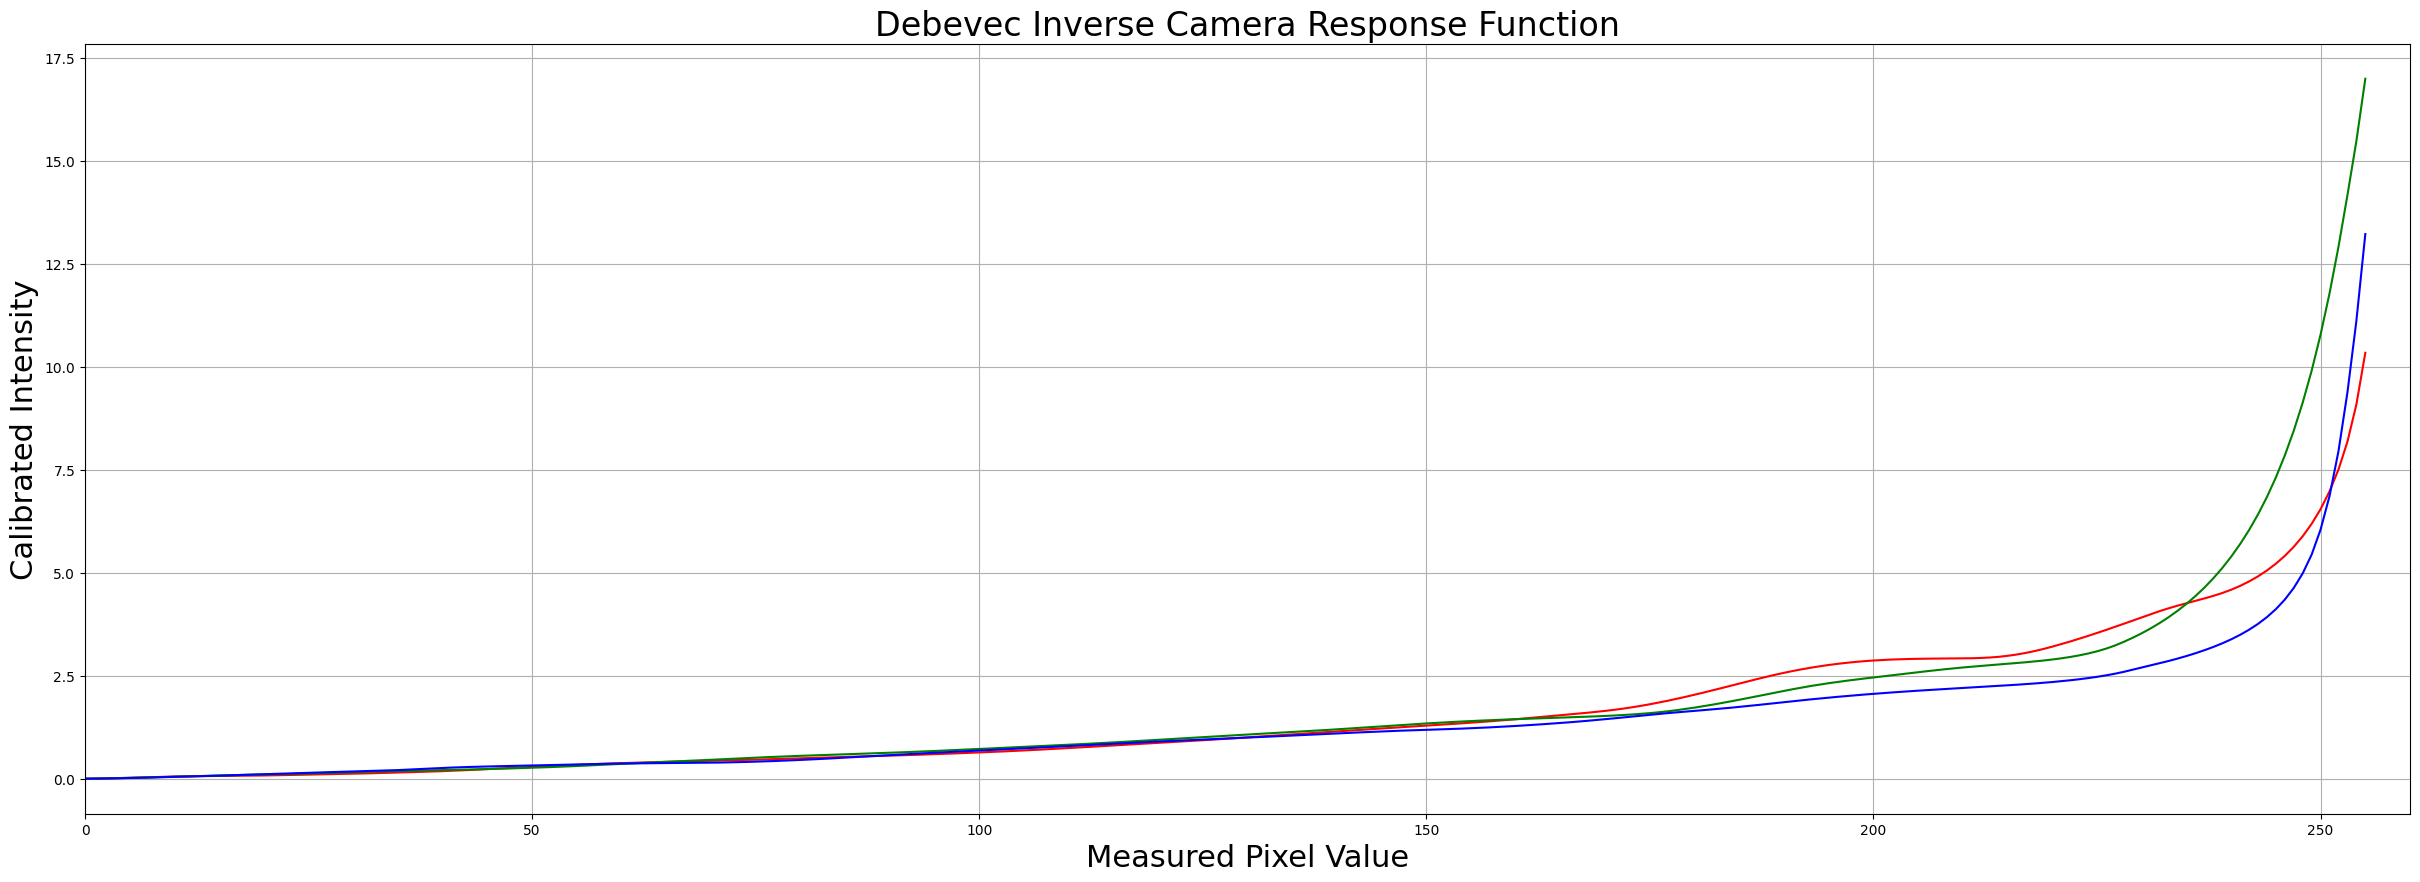

In [9]:
#Find camera response function (CRF)
calibrateDebevec = cv.createCalibrateDebevec()
responseDebevec = calibrateDebevec.process(images, times)

#plot CRF
x = np.arange(256, dtype=np.uint8)
y = np.squeeze(responseDebevec)

ax = plt.figure(figsize=(30, 10))
plt.title("Debevec Inverse Camera Response Function", fontsize=24)
plt.xlabel("Measured Pixel Value", fontsize=22)
plt.ylabel("Calibrated Intensity", fontsize=22)
plt.xlim([0, 260])
plt.grid()
plt.plot(x, y[:, 0], "r", x, y[:, 1], "g", x, y[:, 2], "b")

#Step 4: Merge Exposure into an HDR Image

In [10]:
#merging images into an HDR Linear image
mergeDebevec = cv.createMergeDebevec()
hdrDebevec = mergeDebevec.process(images, times, responseDebevec)

#Step 5: Tonemapping
Many Tonemapping algorithms are available in opencv. because durand has more controls

saved ldr-Drago.jpg


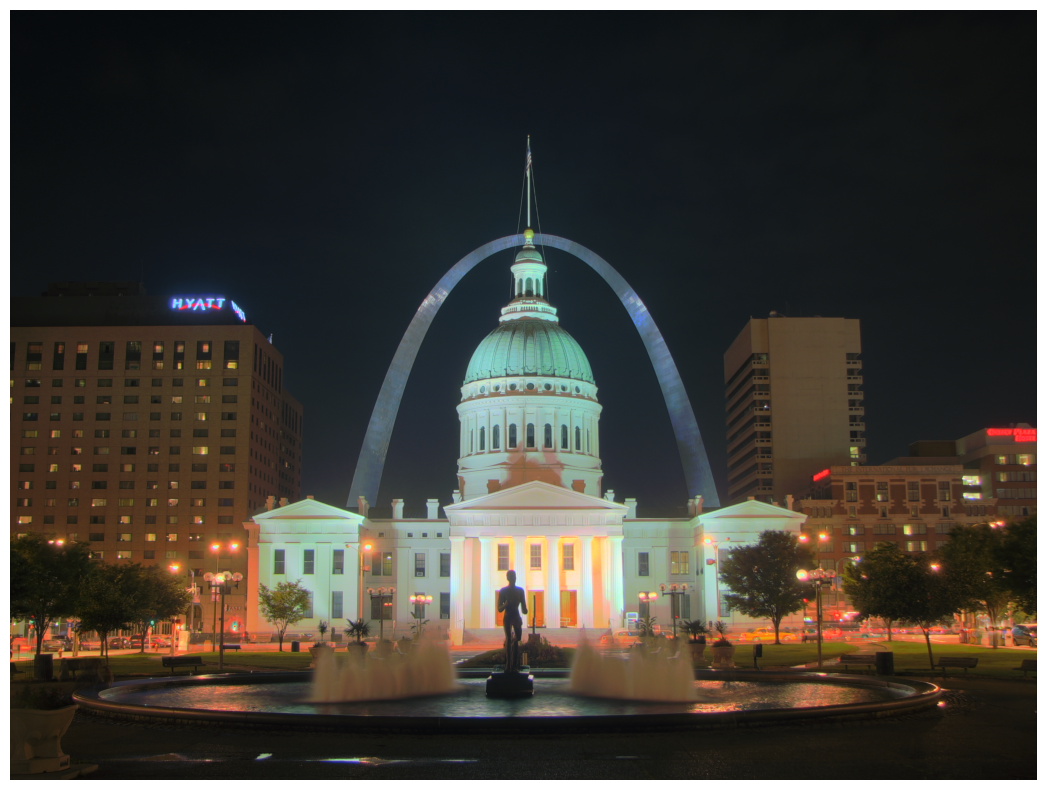

In [11]:
#Tonemap using drago's method to obtain 24-bit color image
tonemapDrago = cv.createTonemapDrago(1.0, 0.7)
ldrDrago = tonemapDrago.process(hdrDebevec)
ldrDrago = 3 * ldrDrago
plt.figure(figsize=(20, 10));plt.imshow(np.clip(ldrDrago, 0, 1));plt.axis("off")
cv.imwrite("ldr-Drago.jpg", ldrDrago * 255)
print("saved ldr-Drago.jpg")

Tonemapping using Reinhards method....
saved ldr-Reinhard.jpg


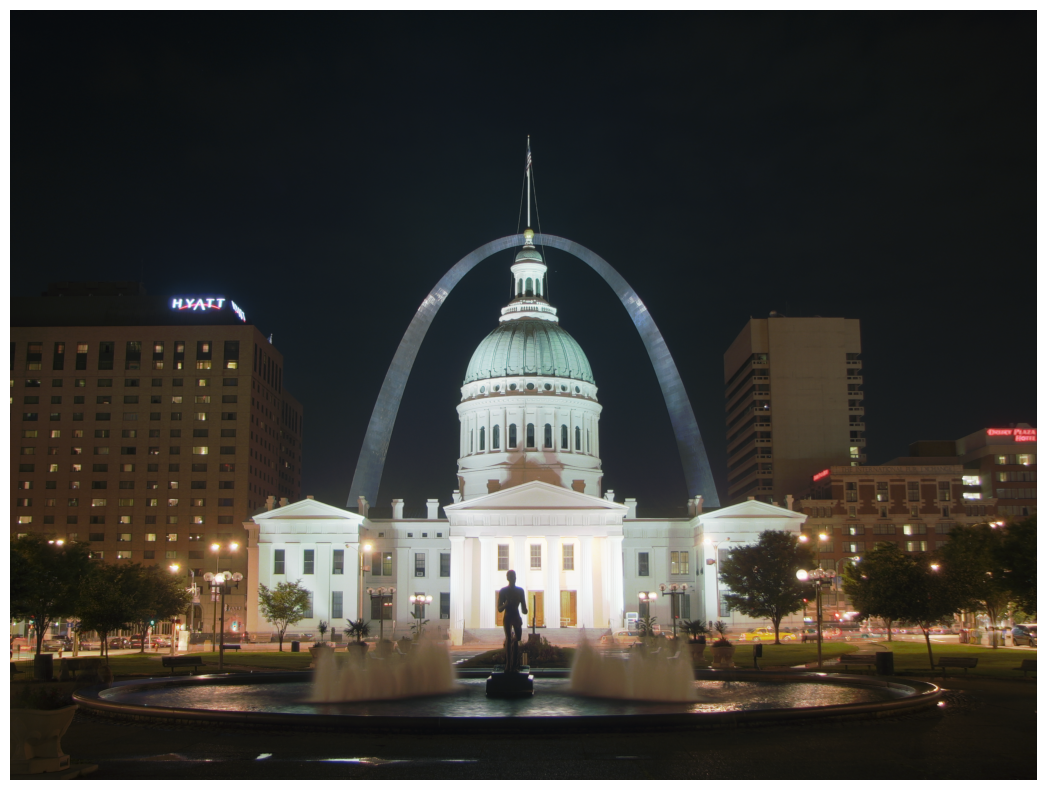

In [12]:
#Tonemap using reinhard's method to obtain 24-bit color image
print("Tonemapping using Reinhards method....")
tonemapReinhard = cv.createTonemapReinhard(1.5, 0, 0, 0)
ldrReinhard = tonemapReinhard.process(hdrDebevec)
plt.figure(figsize=(20, 10));plt.imshow(np.clip(ldrReinhard, 0, 1));plt.axis("off")
cv.imwrite("ldr-Reinhard.jpg", ldrReinhard * 255)
print("saved ldr-Reinhard.jpg")

Tonemapping using Mantuiks method....
saved ldr-Mantiuk.jpg


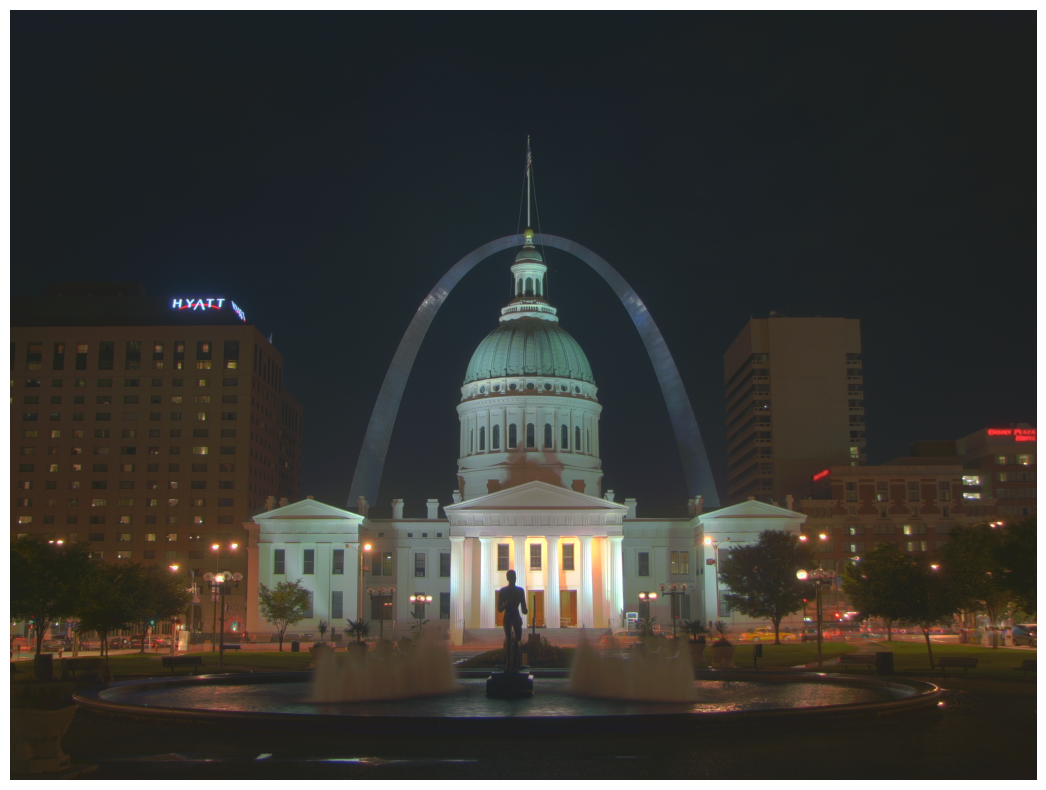

In [14]:
#Tonemap using Mantiuks method to obtain 24-bit color image
print("Tonemapping using Mantuiks method....")
tonemapMantiuk = cv.createTonemapMantiuk(2.2, 0.85, 1.2)
ldrMantiuk = tonemapMantiuk.process(hdrDebevec)
ldrMantiuk = 3 * ldrMantiuk
plt.figure(figsize=(20, 10));plt.imshow(np.clip(ldrMantiuk, 0, 1));plt.axis("off")
cv.imwrite("ldr-Mantiuk.jpg", ldrMantiuk*255)
print("saved ldr-Mantiuk.jpg")